# Question (a)

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
#cnn

import torch.nn as nn
import torch.nn.functional as F


class CNNNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

cnn_net = CNNNet()

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn_net.parameters(), lr=0.001, momentum=0.9)

In [6]:
def test(model,dataloader):
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = model(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
    return float(correct)/float(total)

In [7]:
def train(model,trainloader,testloader,iteration=10):
    train_acc=[]
    test_acc=[]
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    for epoch in range(iteration):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()        

            # print statistics
            running_loss += loss.item()
            #if i % 2000 == 1999:    # print every 2000 mini-batches
                #print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
                #running_loss = 0.0
        train_acc.append(test(model,trainloader))
        test_acc.append(test(model,testloader))

    print('Finished Training')
    return model,train_acc,test_acc

In [8]:
#There is a error of the remark of the results: the accuracy contains both test accuracy and training accuracy.
#(I forgot to change the remark of it before I ran the code)
cnn_net_model, train_acc_cnn, test_acc_cnn = train(cnn_net,trainloader,testloader,10)

Accuracy of the network on the 10000 test images: 49 %
Accuracy of the network on the 10000 test images: 48 %
Accuracy of the network on the 10000 test images: 57 %
Accuracy of the network on the 10000 test images: 56 %
Accuracy of the network on the 10000 test images: 60 %
Accuracy of the network on the 10000 test images: 57 %
Accuracy of the network on the 10000 test images: 63 %
Accuracy of the network on the 10000 test images: 59 %
Accuracy of the network on the 10000 test images: 66 %
Accuracy of the network on the 10000 test images: 60 %
Accuracy of the network on the 10000 test images: 65 %
Accuracy of the network on the 10000 test images: 59 %
Accuracy of the network on the 10000 test images: 69 %
Accuracy of the network on the 10000 test images: 61 %
Accuracy of the network on the 10000 test images: 69 %
Accuracy of the network on the 10000 test images: 61 %
Accuracy of the network on the 10000 test images: 71 %
Accuracy of the network on the 10000 test images: 62 %
Accuracy o

In [9]:
#simple dense neural network

class DNN(nn.Module):
    def __init__(self,num):
        super().__init__()
        self.num = num
        self.layers=[]
        self.f1 = nn.Linear(3072,512)
        for i in range(self.num):
            self.layers.append(nn.Linear(512,512))
        self.f2 = nn.Linear(512,10)
        
    def forward(self, x):
        x = x.view(-1,3072) 
        x = F.relu(self.f1(x))
        for i in range(self.num):
            x = F.relu(self.layers[i](x))
        x = F.dropout(x,p=0.5) 
        x = self.f2(x)
        return x 

In [10]:
dnn_0 = DNN(0)
dnn_0_model, train_acc_dnn_0, test_acc_dnn_0 = train(dnn_0,trainloader,testloader,10)

Accuracy of the network on the 10000 test images: 39 %
Accuracy of the network on the 10000 test images: 38 %
Accuracy of the network on the 10000 test images: 39 %
Accuracy of the network on the 10000 test images: 37 %
Accuracy of the network on the 10000 test images: 41 %
Accuracy of the network on the 10000 test images: 38 %
Accuracy of the network on the 10000 test images: 42 %
Accuracy of the network on the 10000 test images: 40 %
Accuracy of the network on the 10000 test images: 42 %
Accuracy of the network on the 10000 test images: 40 %
Accuracy of the network on the 10000 test images: 44 %
Accuracy of the network on the 10000 test images: 42 %
Accuracy of the network on the 10000 test images: 45 %
Accuracy of the network on the 10000 test images: 42 %
Accuracy of the network on the 10000 test images: 45 %
Accuracy of the network on the 10000 test images: 41 %
Accuracy of the network on the 10000 test images: 46 %
Accuracy of the network on the 10000 test images: 41 %
Accuracy o

In [11]:
dnn_1 = DNN(1)
dnn_1_model, train_acc_dnn_1, test_acc_dnn_1 = train(dnn_1,trainloader,testloader,10)

Accuracy of the network on the 10000 test images: 43 %
Accuracy of the network on the 10000 test images: 42 %
Accuracy of the network on the 10000 test images: 47 %
Accuracy of the network on the 10000 test images: 45 %
Accuracy of the network on the 10000 test images: 49 %
Accuracy of the network on the 10000 test images: 46 %
Accuracy of the network on the 10000 test images: 51 %
Accuracy of the network on the 10000 test images: 46 %
Accuracy of the network on the 10000 test images: 51 %
Accuracy of the network on the 10000 test images: 46 %
Accuracy of the network on the 10000 test images: 53 %
Accuracy of the network on the 10000 test images: 48 %
Accuracy of the network on the 10000 test images: 55 %
Accuracy of the network on the 10000 test images: 48 %
Accuracy of the network on the 10000 test images: 55 %
Accuracy of the network on the 10000 test images: 48 %
Accuracy of the network on the 10000 test images: 56 %
Accuracy of the network on the 10000 test images: 48 %
Accuracy o

In [12]:
dnn_2 = DNN(2)
dnn_2_model, train_acc_dnn_2, test_acc_dnn_2 = train(dnn_2,trainloader,testloader,10)

Accuracy of the network on the 10000 test images: 42 %
Accuracy of the network on the 10000 test images: 42 %
Accuracy of the network on the 10000 test images: 46 %
Accuracy of the network on the 10000 test images: 45 %
Accuracy of the network on the 10000 test images: 49 %
Accuracy of the network on the 10000 test images: 47 %
Accuracy of the network on the 10000 test images: 52 %
Accuracy of the network on the 10000 test images: 48 %
Accuracy of the network on the 10000 test images: 54 %
Accuracy of the network on the 10000 test images: 49 %
Accuracy of the network on the 10000 test images: 55 %
Accuracy of the network on the 10000 test images: 48 %
Accuracy of the network on the 10000 test images: 56 %
Accuracy of the network on the 10000 test images: 49 %
Accuracy of the network on the 10000 test images: 57 %
Accuracy of the network on the 10000 test images: 49 %
Accuracy of the network on the 10000 test images: 58 %
Accuracy of the network on the 10000 test images: 49 %
Accuracy o

In [13]:
dnn_3 = DNN(3)
dnn_3_model, train_acc_dnn_3, test_acc_dnn_3 = train(dnn_3,trainloader,testloader,10)

Accuracy of the network on the 10000 test images: 36 %
Accuracy of the network on the 10000 test images: 36 %
Accuracy of the network on the 10000 test images: 42 %
Accuracy of the network on the 10000 test images: 42 %
Accuracy of the network on the 10000 test images: 46 %
Accuracy of the network on the 10000 test images: 45 %
Accuracy of the network on the 10000 test images: 49 %
Accuracy of the network on the 10000 test images: 46 %
Accuracy of the network on the 10000 test images: 50 %
Accuracy of the network on the 10000 test images: 47 %
Accuracy of the network on the 10000 test images: 52 %
Accuracy of the network on the 10000 test images: 49 %
Accuracy of the network on the 10000 test images: 53 %
Accuracy of the network on the 10000 test images: 48 %
Accuracy of the network on the 10000 test images: 55 %
Accuracy of the network on the 10000 test images: 50 %
Accuracy of the network on the 10000 test images: 56 %
Accuracy of the network on the 10000 test images: 50 %
Accuracy o

In [14]:
dnn_4 = DNN(4)
dnn_4_model, train_acc_dnn_4, test_acc_dnn_4 = train(dnn_4,trainloader,testloader,10)

Accuracy of the network on the 10000 test images: 26 %
Accuracy of the network on the 10000 test images: 27 %
Accuracy of the network on the 10000 test images: 34 %
Accuracy of the network on the 10000 test images: 34 %
Accuracy of the network on the 10000 test images: 38 %
Accuracy of the network on the 10000 test images: 39 %
Accuracy of the network on the 10000 test images: 42 %
Accuracy of the network on the 10000 test images: 41 %
Accuracy of the network on the 10000 test images: 44 %
Accuracy of the network on the 10000 test images: 43 %
Accuracy of the network on the 10000 test images: 45 %
Accuracy of the network on the 10000 test images: 45 %
Accuracy of the network on the 10000 test images: 47 %
Accuracy of the network on the 10000 test images: 46 %
Accuracy of the network on the 10000 test images: 49 %
Accuracy of the network on the 10000 test images: 46 %
Accuracy of the network on the 10000 test images: 50 %
Accuracy of the network on the 10000 test images: 47 %
Accuracy o

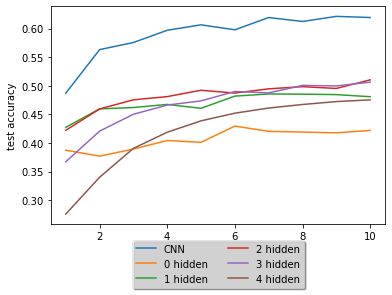

In [37]:
import matplotlib.pyplot as plt

epoch = [1,2,3,4,5,6,7,8,9,10]
plt.plot(epoch,test_acc_cnn,label=f"CNN") 
plt.plot(epoch,test_acc_dnn_0,label=f"0 hidden") 
plt.plot(epoch,test_acc_dnn_1,label=f"1 hidden")
plt.plot(epoch,test_acc_dnn_2,label=f"2 hidden")
plt.plot(epoch,test_acc_dnn_3,label=f"3 hidden")
plt.plot(epoch,test_acc_dnn_4,label=f"4 hidden")
plt.ylabel('test accuracy')
leg = plt.legend(loc='upper center', ncol=2, shadow=True, fancybox=True, bbox_to_anchor=(0.5, -0.05))
leg.get_frame().set_alpha(0.5)
plt.show()

The trend of these five curves are similar, while CNN performs obviously better than the other models. I think it because feature extraction of CNN is carried out through convolution operation. Each convolution will consider the context information of features, and as the model deepens, local features extracted from shallow layers are continuously processed and integrated to obtain deep high-dimensional features. That is, an object in any area of the image can be correctly identified. However, DNN does not consider the structural information of the image and each layer will do a global feature extraction, thus the process is not progressive.

# Question (b)

In [23]:
#cnn with sigmoid function

class Sig(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.sigmoid(self.conv1(x)))
        x = self.pool(F.sigmoid(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x

sig = Sig()

In [24]:
sig_model, train_acc_sig, test_acc_sig = train(sig,trainloader,testloader,10)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Accuracy of the network on the 10000 test images: 10 %
Accuracy of the network on the 10000 test images: 10 %
Accuracy of the network on the 10000 test images: 10 %
Accuracy of the network on the 10000 test images: 10 %
Accuracy of the network on the 10000 test images: 10 %
Accuracy of the network on the 10000 test images: 10 %
Accuracy of the network on the 10000 test images: 10 %
Accuracy of the network on the 10000 test images: 10 %
Accuracy of the network on the 10000 test images: 10 %
Accuracy of the network on the 10000 test images: 10 %
Accuracy of the network on the 10000 test images: 10 %
Accuracy of the network on the 10000 test images: 10 %
Accuracy of the network on the 10000 test images: 10 %
Accuracy of the network on the 10000 test images: 10 %
Accuracy of the network on the 10000 test images: 10 %
Accuracy of the network on the 10000 test images: 10 %
Accuracy of the network on the 10000 test images: 10 %
Accuracy of the network on the 10000 test images: 10 %
Accuracy o

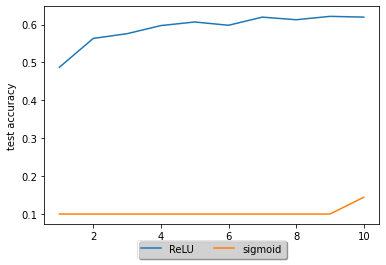

In [25]:
epoch = [1,2,3,4,5,6,7,8,9,10]
plt.plot(epoch,test_acc_cnn,label=f"ReLU") 
plt.plot(epoch,test_acc_sig,label=f"sigmoid") 
plt.ylabel('test accuracy')
leg = plt.legend(loc='upper center', ncol=2, shadow=True, fancybox=True, bbox_to_anchor=(0.5, -0.05))
leg.get_frame().set_alpha(0.5)
plt.show()

ReLU performs better than the sigmoid function. Because ReLU is more computationally efficient to compute than Sigmoid functions since Relu just needs to pick max(0,𝑥) and not perform expensive exponential operations as in Sigmoids.

# Question (c)

In [26]:
#cnn with drop out

class Drop_cnn(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.dropout(x,p=0.5) 
        x = F.relu(self.fc2(x))
        x = F.dropout(x,p=0.5) 
        x = self.fc3(x)
        return x

drop_cnn = Drop_cnn()

In [28]:
drop_model, train_acc_drop, test_acc_drop = train(drop_cnn,trainloader,testloader,60)

Accuracy of the network on the 10000 test images: 36 %
Accuracy of the network on the 10000 test images: 37 %
Accuracy of the network on the 10000 test images: 45 %
Accuracy of the network on the 10000 test images: 44 %
Accuracy of the network on the 10000 test images: 47 %
Accuracy of the network on the 10000 test images: 47 %
Accuracy of the network on the 10000 test images: 51 %
Accuracy of the network on the 10000 test images: 50 %
Accuracy of the network on the 10000 test images: 52 %
Accuracy of the network on the 10000 test images: 50 %
Accuracy of the network on the 10000 test images: 54 %
Accuracy of the network on the 10000 test images: 52 %
Accuracy of the network on the 10000 test images: 55 %
Accuracy of the network on the 10000 test images: 53 %
Accuracy of the network on the 10000 test images: 55 %
Accuracy of the network on the 10000 test images: 53 %
Accuracy of the network on the 10000 test images: 54 %
Accuracy of the network on the 10000 test images: 51 %
Accuracy o

In [30]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

cnn = CNN()

In [31]:
cnn_net_model2, train_acc_cnn2, test_acc_cnn2 = train(cnn,trainloader,testloader,60)

Accuracy of the network on the 10000 test images: 49 %
Accuracy of the network on the 10000 test images: 48 %
Accuracy of the network on the 10000 test images: 57 %
Accuracy of the network on the 10000 test images: 55 %
Accuracy of the network on the 10000 test images: 60 %
Accuracy of the network on the 10000 test images: 57 %
Accuracy of the network on the 10000 test images: 62 %
Accuracy of the network on the 10000 test images: 58 %
Accuracy of the network on the 10000 test images: 64 %
Accuracy of the network on the 10000 test images: 58 %
Accuracy of the network on the 10000 test images: 67 %
Accuracy of the network on the 10000 test images: 61 %
Accuracy of the network on the 10000 test images: 69 %
Accuracy of the network on the 10000 test images: 61 %
Accuracy of the network on the 10000 test images: 72 %
Accuracy of the network on the 10000 test images: 62 %
Accuracy of the network on the 10000 test images: 72 %
Accuracy of the network on the 10000 test images: 62 %
Accuracy o

In [32]:
#data augmentation

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.RandomHorizontalFlip(p=0.5),  
     transforms.RandomGrayscale(p=0.5), 
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader_aug = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader_aug = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [33]:
cnn2 = CNN()
cnn_net_aug, train_acc_aug, test_acc_aug = train(cnn2,trainloader_aug,testloader_aug,60)

Accuracy of the network on the 10000 test images: 43 %
Accuracy of the network on the 10000 test images: 43 %
Accuracy of the network on the 10000 test images: 54 %
Accuracy of the network on the 10000 test images: 53 %
Accuracy of the network on the 10000 test images: 52 %
Accuracy of the network on the 10000 test images: 51 %
Accuracy of the network on the 10000 test images: 58 %
Accuracy of the network on the 10000 test images: 56 %
Accuracy of the network on the 10000 test images: 61 %
Accuracy of the network on the 10000 test images: 59 %
Accuracy of the network on the 10000 test images: 62 %
Accuracy of the network on the 10000 test images: 59 %
Accuracy of the network on the 10000 test images: 65 %
Accuracy of the network on the 10000 test images: 61 %
Accuracy of the network on the 10000 test images: 63 %
Accuracy of the network on the 10000 test images: 59 %
Accuracy of the network on the 10000 test images: 66 %
Accuracy of the network on the 10000 test images: 62 %
Accuracy o

In [34]:
drop = Drop_cnn()
drop_aug, train_acc_drop_aug, test_acc_drop_aug = train(drop,trainloader_aug,testloader_aug,60)

Accuracy of the network on the 10000 test images: 35 %
Accuracy of the network on the 10000 test images: 34 %
Accuracy of the network on the 10000 test images: 42 %
Accuracy of the network on the 10000 test images: 41 %
Accuracy of the network on the 10000 test images: 46 %
Accuracy of the network on the 10000 test images: 46 %
Accuracy of the network on the 10000 test images: 46 %
Accuracy of the network on the 10000 test images: 45 %
Accuracy of the network on the 10000 test images: 50 %
Accuracy of the network on the 10000 test images: 50 %
Accuracy of the network on the 10000 test images: 52 %
Accuracy of the network on the 10000 test images: 50 %
Accuracy of the network on the 10000 test images: 53 %
Accuracy of the network on the 10000 test images: 52 %
Accuracy of the network on the 10000 test images: 55 %
Accuracy of the network on the 10000 test images: 53 %
Accuracy of the network on the 10000 test images: 54 %
Accuracy of the network on the 10000 test images: 52 %
Accuracy o

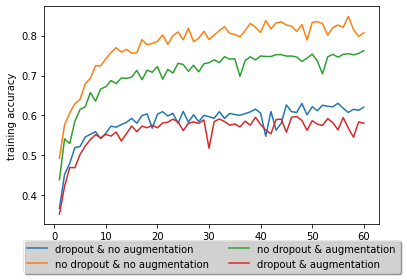

In [35]:
epoch = range(1,61)
plt.plot(epoch,train_acc_drop,label=f"dropout & no augmentation") 
plt.plot(epoch,train_acc_cnn2,label=f"no dropout & no augmentation") 
plt.plot(epoch,train_acc_aug,label=f"no dropout & augmentation") 
plt.plot(epoch,train_acc_drop_aug,label=f"dropout & augmentation") 
plt.ylabel('training accuracy')
leg = plt.legend(loc='upper center', ncol=2, shadow=True, fancybox=True, bbox_to_anchor=(0.5, -0.05))
leg.get_frame().set_alpha(0.5)
plt.show()

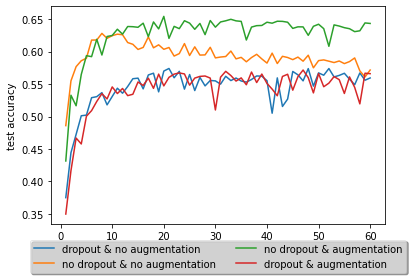

In [36]:
epoch = range(1,61)
plt.plot(epoch,test_acc_drop,label=f"dropout & no augmentation") 
plt.plot(epoch,test_acc_cnn2,label=f"no dropout & no augmentation") 
plt.plot(epoch,test_acc_aug,label=f"no dropout & augmentation") 
plt.plot(epoch,test_acc_drop_aug,label=f"dropout & augmentation") 
plt.ylabel('test accuracy')
leg = plt.legend(loc='upper center', ncol=2, shadow=True, fancybox=True, bbox_to_anchor=(0.5, -0.05))
leg.get_frame().set_alpha(0.5)
plt.show()

In the training data, the model without drop out and data augmentation perfroms better than other models. While in the test data, the model without drop out but with data augmentation performs better than other models.    
The trend of all the curves in both the plot of training data and test data tend to be stable when epoch increases. As the number of epochs reaches 100, the curves are stable and the accuracy is going to approach a fixed value. Besides, the accuracy of training data is higher than the test data.